In [1]:
# While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for 
# predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance 
# on what would be the most probable class for that data point. For this, we use Logistic Regression.

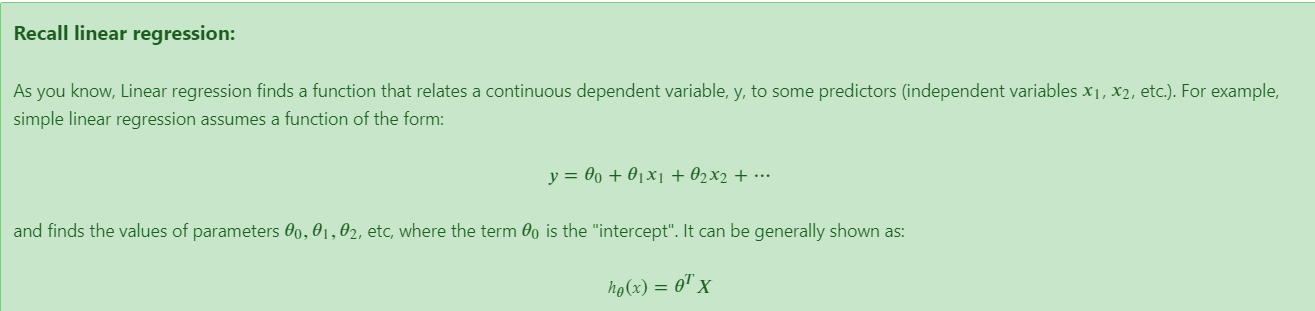

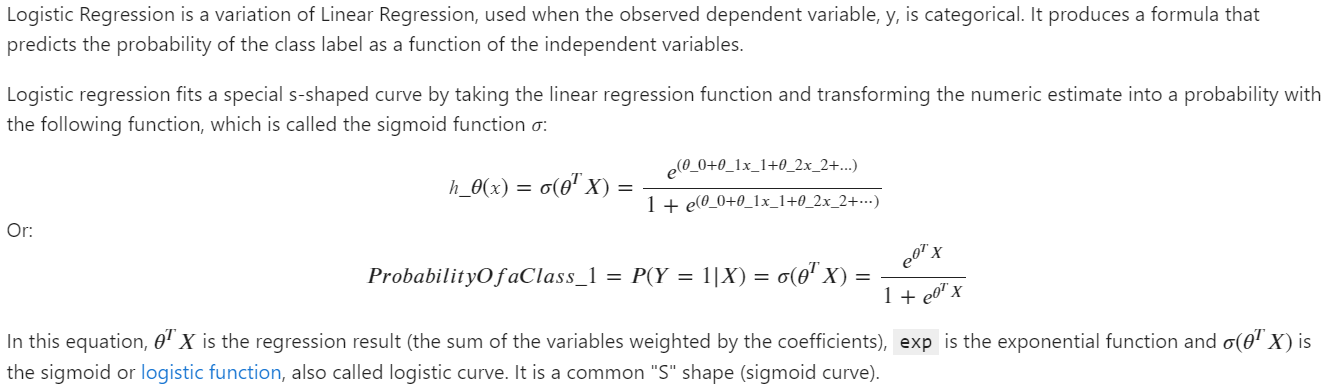

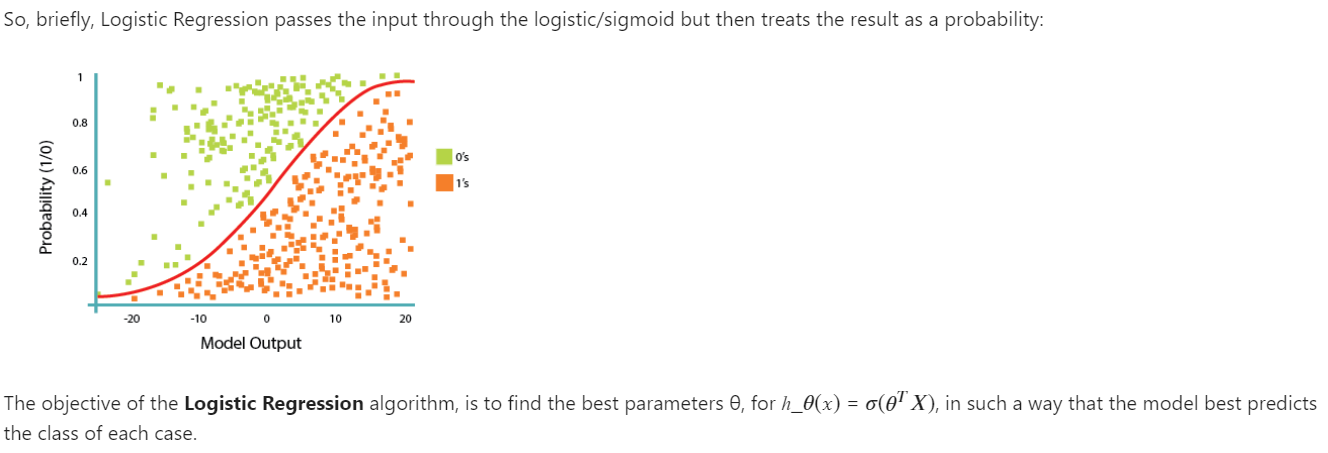

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
churn_df = pd.read_csv("C:\\Users\\faiza\\OneDrive\\Desktop\\WA_Fn-UseC_-Telco-Customer-Churn.csv", encoding="ISO-8859-1")
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
churn_df.shape

(7043, 21)

In [7]:
#Data pre-processing and selection
cdf = churn_df[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
cdf

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [8]:
data = pd.get_dummies(cdf["Churn"])
data

,No,Yes
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


In [21]:
churn_df['Churn'] = churn_df['Churn'].astype('int')
churn_df

ValueError: invalid literal for int() with base 10: 'No'

In [9]:
cdf[["No","Yes"]]=data
cdf

C:\Users\faiza\AppData\Local\Temp\ipykernel_16136\790301384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf[["No","Yes"]]=data
C:\Users\faiza\AppData\Local\Temp\ipykernel_16136\790301384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf[["No","Yes"]]=data


,tenure,SeniorCitizen,MonthlyCharges,Churn,No,Yes
0,1,0,29.85,No,1,0
1,34,0,56.95,No,1,0
2,2,0,53.85,Yes,0,1
3,45,0,42.30,No,1,0
4,2,0,70.70,Yes,0,1
...,...,...,...,...,...,...
7038,24,0,84.80,No,1,0
7039,72,0,103.20,No,1,0
7040,11,0,29.60,No,1,0
7041,4,1,74.40,Yes,0,1


In [10]:
cdf.drop(["Churn"],axis=1)

,tenure,SeniorCitizen,MonthlyCharges,No,Yes
0,1,0,29.85,1,0
1,34,0,56.95,1,0
2,2,0,53.85,0,1
3,45,0,42.30,1,0
4,2,0,70.70,0,1
...,...,...,...,...,...
7038,24,0,84.80,1,0
7039,72,0,103.20,1,0
7040,11,0,29.60,1,0
7041,4,1,74.40,0,1


In [11]:
X = np.asarray(cdf[['tenure','SeniorCitizen','MonthlyCharges']])
X

array([[  1.  ,   0.  ,  29.85],
       [ 34.  ,   0.  ,  56.95],
       [  2.  ,   0.  ,  53.85],
       ...,
       [ 11.  ,   0.  ,  29.6 ],
       [  4.  ,   1.  ,  74.4 ],
       [ 66.  ,   0.  , 105.65]])

In [12]:
Y = np.asarray(cdf[['Yes']])
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=uint8)

In [13]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.27744458, -0.43991649, -1.16032292],
       [ 0.06632742, -0.43991649, -0.25962894],
       [-1.23672422, -0.43991649, -0.36266036],
       ...,
       [-0.87024095, -0.43991649, -1.1686319 ],
       [-1.15528349,  2.27315869,  0.32033821],
       [ 1.36937906, -0.43991649,  1.35896134]])

In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (5634, 3) (5634, 1)
Test set: (1409, 3) (1409, 1)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

C:\Users\faiza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [16]:
yhat = LR.predict(X_test)
yhat


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [17]:
Y_test

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)